Instructions to Run

Cell -> Run All

# Decision Tree

This notebook implements one of the methods we applied: Decision Tree <br> <br>
Decision tree is a supervised learning method used for classification. It is used to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The library considered for the implementation is from sklearn

NoteBook Contents:
1. Importing required libraries
2. Reading Input file and checking frequency of openings
3. Replacing Categorical values with numbers as Decision Tree cannot handle Categorical values
3. Building Decision Tree model For an Opening and Elo ratings of Players (For various depth, test size =0.2)
5. Using K-Fold cross validation(10 splits, depth of DT:14)
6. Finding Accuracy, Plotting Tree

### Building Decision Tree model For an Opening and Elo ratings of Players

Here we consider 3 columns of dataframe as Features - Opening, White Elo Rating, Black Elo Rating
The target column is Game Result

We build the decisions for various depth, with 80% of data as training and 20% as test data.

### Importing required libraries

In [15]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
import sklearn

import time
from sklearn.model_selection import KFold

### Reading the input file

In [16]:
df = pd.read_csv('data/output/output.csv')
print(len(df))

83483


### Checking count of each opening

In [17]:
print(df['Opening'].value_counts())

sicilian_rossolimo        25710
GiuocoPiano               15296
Nimzowitsch-Larsen        10163
four_knights              10066
caro_kann_classic          9616
Caro-Kann2c4               4403
Kings_Gamit                4277
sicilian_dragon_other6     1752
qid4e3                     1596
Modern                      604
Name: Opening, dtype: int64


### Replacing Opening and game result with numerical values as Decision Tree cannot handle Categorical values

In [18]:
df.replace({'Opening': {'sicilian_rossolimo':1, 'caro_kann_classic':2, 'sicilian_dragon_other6':3, 'four_knights':4, 'qid4e3':5,
                        'GiuocoPiano': 6,'Nimzowitsch-Larsen':7, 'Caro-Kann2c4': 9, 'Kings_Gamit':10, 'Modern':11}}, inplace=True)


df.replace({'game_result': {'draw':0, 'white':1, 'black':2}}, inplace=True)

### Decision Tree Based on Opening, WhiteElo and BlackElo

#### Splitting the data into train and test

In [19]:
def prep_training(df, first_n_moves):
    
    x = df[['WhiteElo', 'BlackElo', 'Opening']]
    y = df.iloc[:, 10]
   
    return sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [20]:
x_train, x_test, y_train, y_test = prep_training(df, 4)

### Building decision tree
##### Finding accuracy 

In [21]:
def build_decision_tree(depth, x_train,y_train, x_test, y_test):
    print("\nDepth: " +str(depth))

    #  1. create a model
    clf = DecisionTreeClassifier(max_depth =depth) #max_depth = depth

    #  2. feed training data into the model
    clf = clf.fit(x_train,y_train)

    #  3. predict values for your test data
    y_pred = clf.predict(x_test)
    
    #class_n = ['result']
    plt.figure(figsize=(12,12))  # set plot size
    class_n = ['draw', 'white', 'black']
    tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n);
    plt.show()

    #  5. find the training and testing accuracy
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Depth: 12


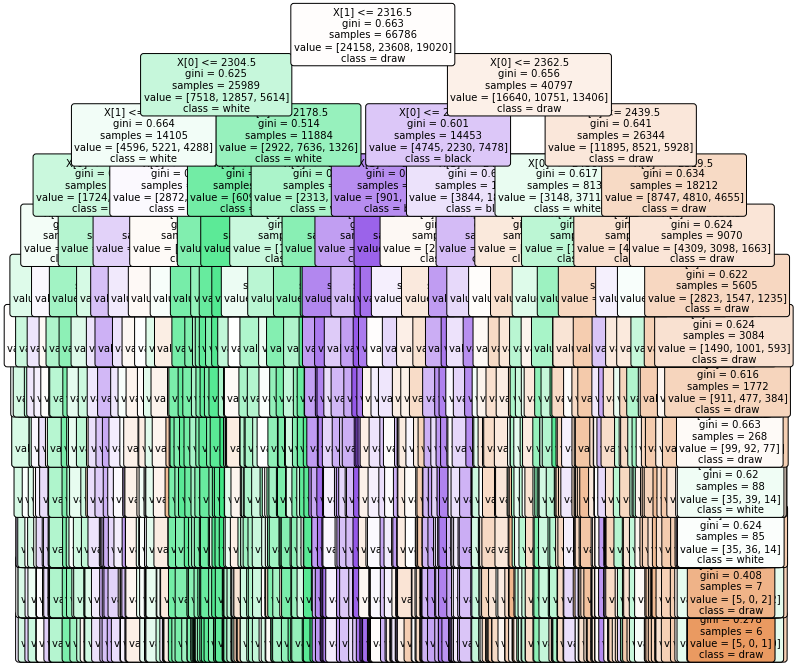

Accuracy: 0.5023058034377433

Time:
114.05778408050537


In [22]:
for depth in [12, 20, 40]:
    start = time.time()
    build_decision_tree(depth, x_train,y_train, x_test, y_test)
    end = time.time()
    print('\nTime:')
    print(end - start)

### Using K-Fold cross validation

0

Depth: 2


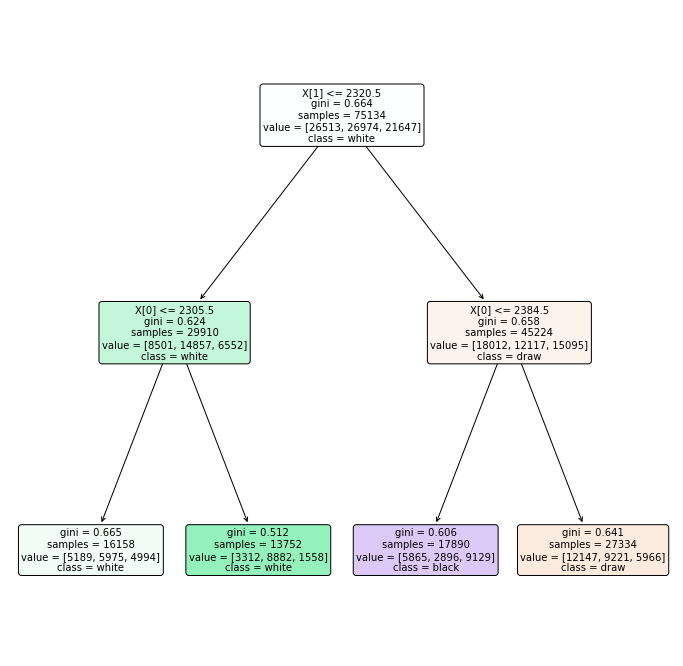

Accuracy: 0.4698766319319679
1

Depth: 2


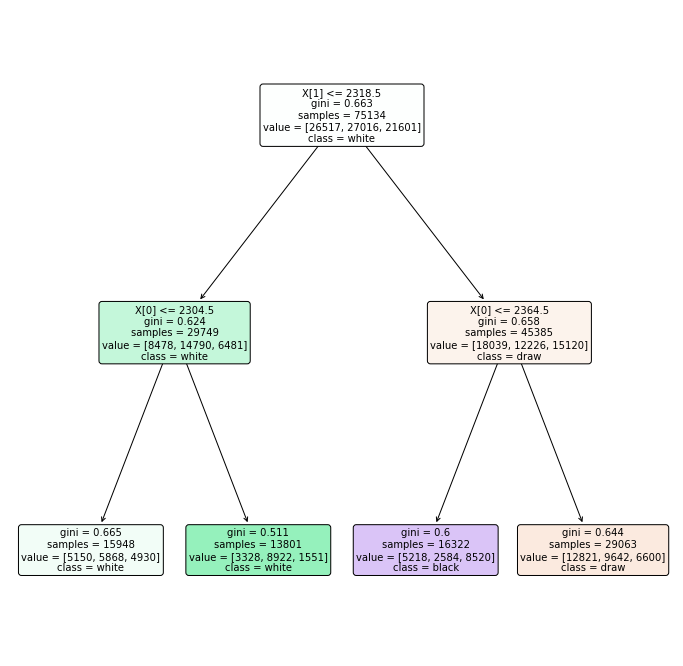

Accuracy: 0.48712420649179544
2

Depth: 2


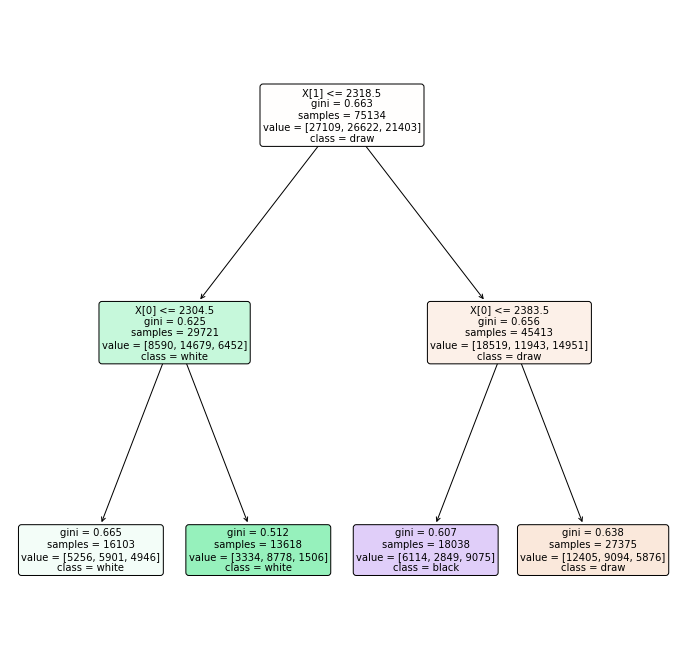

Accuracy: 0.46520541382201464
3

Depth: 2


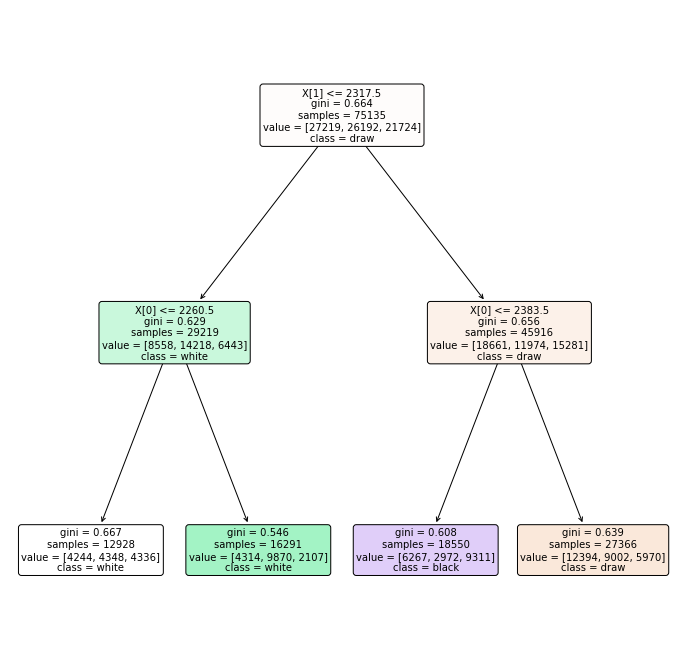

Accuracy: 0.49221370388116914
4

Depth: 2


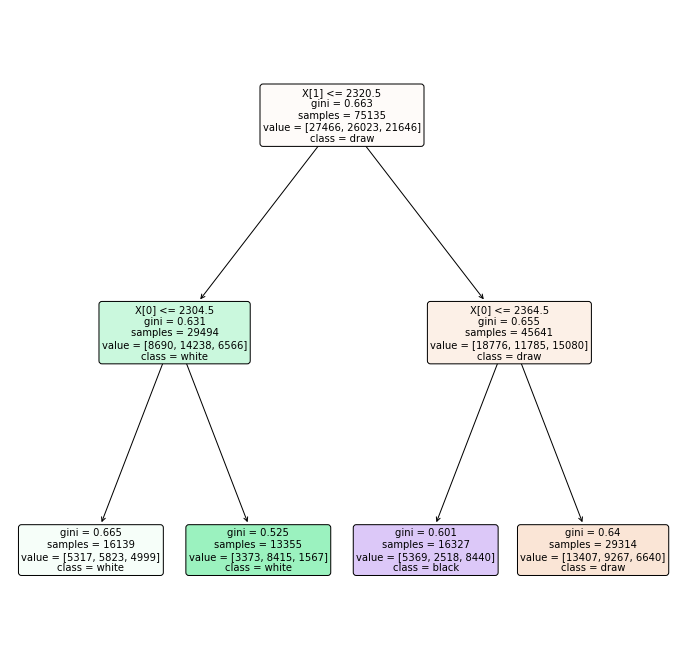

Accuracy: 0.4953282223287015
5

Depth: 2


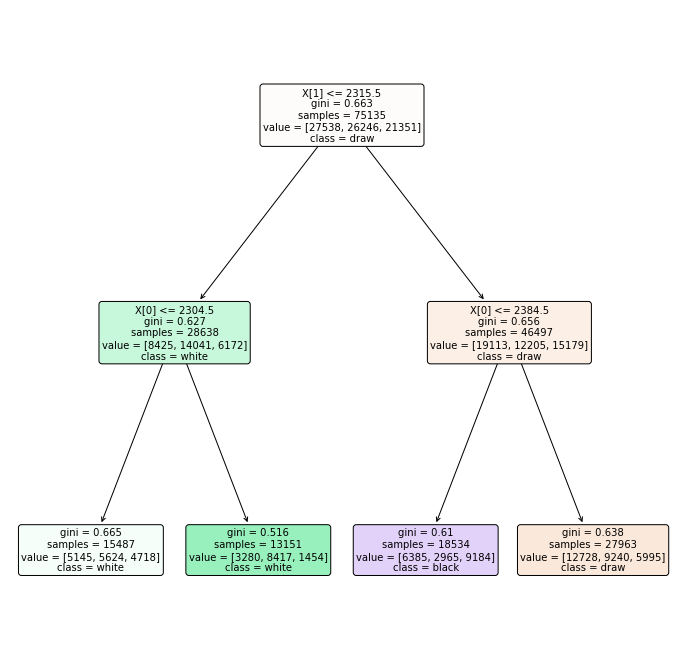

Accuracy: 0.4867034020124581
6

Depth: 2


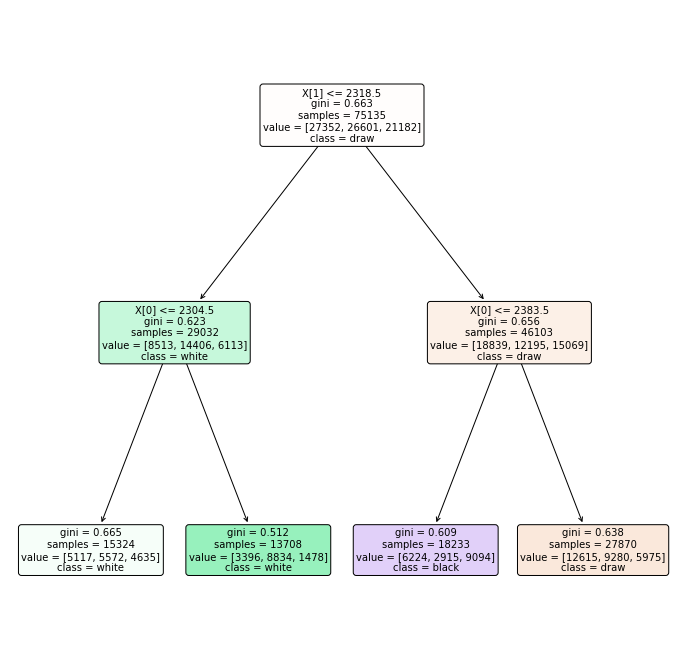

Accuracy: 0.4705318639195017
7

Depth: 2


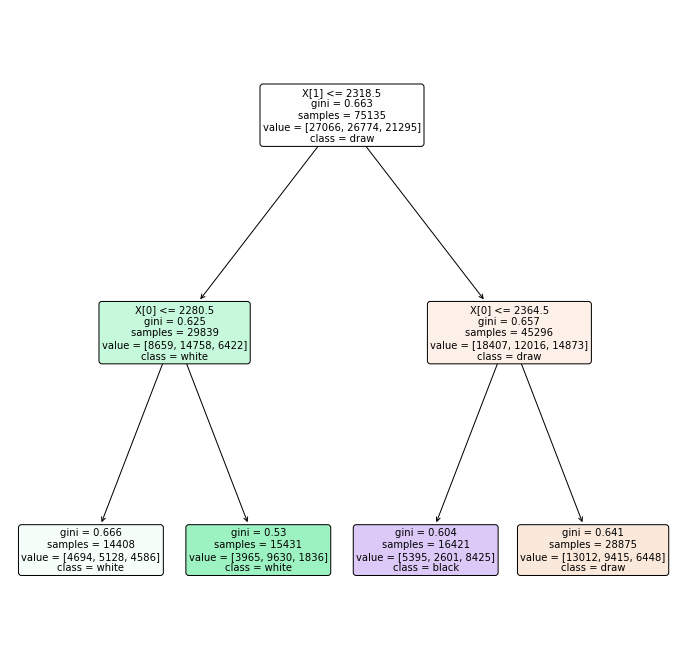

Accuracy: 0.4795160517489219
8

Depth: 2


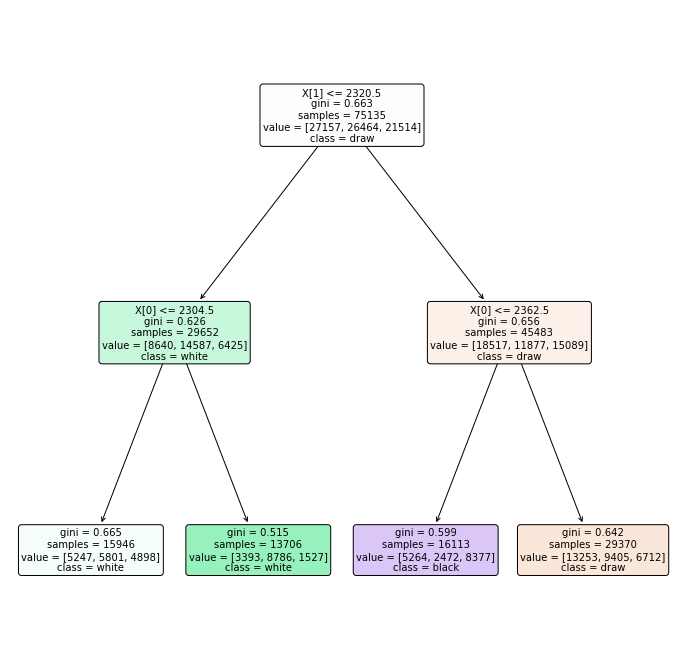

Accuracy: 0.48143267848586485
9

Depth: 2


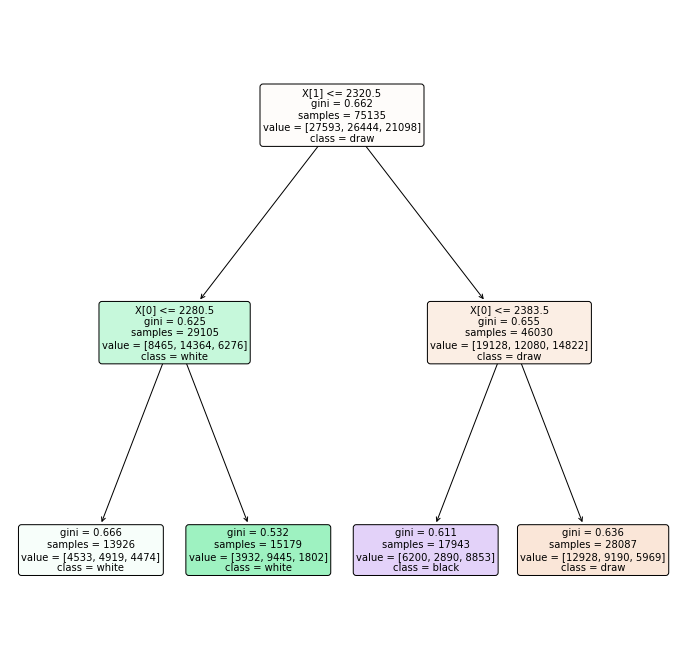

Accuracy: 0.4698131288931481


In [27]:
x = df[['WhiteElo', 'BlackElo', 'Opening']]
y = df.iloc[:, 10]

x = x.to_numpy()
y =y.to_numpy()

kf = KFold(n_splits=10, random_state=None)
#kf.get_n_splits(x)
i = 0

for train_index, test_index in kf.split(x):
    print(i)
    i+=1
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    build_decision_tree(14, x_train,y_train, x_test, y_test)